<a href="https://colab.research.google.com/github/saritmaitra/Momentum_Trading/blob/main/RSI_Momentum_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A momentum strategy basically bets on the continuation of an existing market trend. For example, if the market is or starts going up, we will bet that the trend will continue for a while and we will try to make our trading strategy based on this.

Momentum indicators can help us locate the entry and exit points to follow momentum strategies. One of this type of indicators is the Relative Strength Index (RSI). This indicator is the one that we will use in order to define our backtesting strategy with Python.

## Relative Strength Index (RSI)
The Relative Strength Index (RSI) is a technical indicator that measures the speed and change of price movements. It was developed by J. Welles Wilder.

In [ ]:
!pip install yfinance
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.transforms as transform
import matplotlib.gridspec as gridspec
import pandas as pd
from pandas.tseries.offsets import MonthEnd
pd.options.mode.chained_assignment = None
pd.set_option('use_inf_as_na', True)
from pandas import DataFrame, concat

In [2]:
ticker = "CL=F"
start_date = dt.datetime(2018,1,1)
end_date = dt.datetime(2020,12,31)
class DataBase():
  def __init__(self, ticker, days):
    self.ticker = ticker
    data = yf.download(ticker, start = start_date, end =end_date )
    self.df = DataFrame(data)
    pd.set_option("display.max_columns", None)
    self.df[self.df.index.dayofweek < 4]
    self.df= self.df[-days:]

  def quote(self):
    return self.df

db = DataBase(ticker, 1000)
df = db.quote()
print(df.tail(10))

df['MA_14'] = df['Adj Close'].rolling(window=14).mean()
df.dropna(inplace=True)

# plt.rcParams.update({'font.size': 10})
# fig, ax1 = plt.subplots(figsize = (15,6))
# ax1.set_ylabel("Price in US$")
# ax1.set_xlabel("Timestamp")
# ax1.plot('Adj Close', data=df, label = "Adj Close Price")
# ax1.plot('MA_15', data=df, label = "3 weeks MA"); plt.grid(True)
# ax1.set_title('Crude Oil price & 15 days rolling average')
# plt.show()

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2020-12-15  46.990002  47.730000  46.540001  47.619999  47.619999  311169
2020-12-16  47.599998  47.939999  47.169998  47.820000  47.820000  275331
2020-12-17  47.849998  48.590000  47.810001  48.360001  48.360001   96536
2020-12-18  48.430000  49.279999  48.099998  49.099998  49.099998   83711
2020-12-21  48.540001  48.610001  46.180000  47.740002  47.740002  478098
2020-12-22  47.930000  47.959999  46.599998  47.020000  47.020000  295737
2020-12-23  46.790001  48.500000  46.160000  48.119999  48.119999  344306
2020-12-28  48.230000  48.959999  47.500000  47.619999  47.619999  238462
2020-12-29  47.720001  48.349998  47.680000  48.000000  48.000000  213778
2020-12-30  48.130001  48.660000  47.610001  48.400002  48.400002  266957


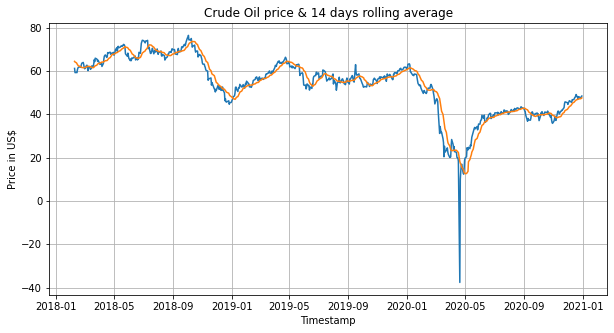

In [3]:
df['MA_14'] = df['Adj Close'].rolling(window=14).mean()
df.dropna(inplace=True)

plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize = (10,5))
ax1.set_ylabel("Price in US$")
ax1.set_xlabel("Timestamp")
ax1.plot('Adj Close', data=df, label = "Adj Close Price")
ax1.plot('MA_14', data=df, label = "14 days MA"); plt.grid(True)
ax1.set_title('Crude Oil price & 14 days rolling average')
plt.show()

It measures the relative strength of upside and downside moves in security prices.

## Formula:

- RSI = 100 – 100 / ( 1 + RS )
- RS = Relative Strength = AvgU / AvgD
- AvgU = average of all up moves in the last N price bars
- AvgD = average of all down moves in the last N price bars
- N = the period of RSI

## RSI values
The Relative Strenght Index can reach values from 0 to 100. 
- Values close to zero are a sign of declining (bearish) market; 
- values close to 100 occur when prices are rising and the rises are greater than the declines.

High RSI means that the second part of the RSI formula (behind the minus sign) is very small and RS is very large, which means that recent up moves have been much greater than recent down moves. In other words, high RSI values are a sign of bullish market (which may be overbought – depending on your particular view and trading style).

Conversely, low RSI means that RS is also low and recent down moves have been much greater than recent up moves – in other words, bearish (and possibly oversold) market.

When there are no down moves and AvgD is zero, RS can’t be calculated (you would be dividing by zero). In such case, we can consider RS close to infinite and RSI is 100.

## RSI overbought and oversold
- RSI value over 80 or 90 is considered overbought.
- RSI value under 20 or 10 is considered oversold.

The tighter condition we choose (higher RSI value for overbought condition, lower RSI value for oversold condition), the fewer times RSI will get to the overbought or oversold territory and the fewer signals or trading situations we get.

In [4]:
df['price_change'] = df['Adj Close'].pct_change()
df = df.dropna()

# https://www.macroption.com/rsi/ 

df['up_move'] = df['price_change'].apply(lambda x: x if x > 0 else 0)
df['down_move'] = df['price_change'].apply(lambda x: abs(x) if x < 0 else 0)

df['avg_up'] = df['up_move'].ewm(span=15).mean()
df['avg_down'] = df['down_move'].ewm(span=15).mean()
df = df.dropna()

df['RS'] = df['avg_up'] / df['avg_down']
df = df.dropna()
df['RSI'] = df['RS'].apply(lambda x: 100 - (100/(x+1)))

df.loc[(df['Adj Close'] > df['MA_14']) & (df['RSI'] > 30), "BUY"] = 'YES'
df.loc[(df['Adj Close'] < df['MA_14']) | (df['RSI'] < 30), "BUY"] = 'NO'
df

,Open,High,Low,Close,Adj Close,Volume,MA_14,price_change,up_move,down_move,avg_up,avg_down,RS,RSI,BUY
Date,,,,,,,,,,,,,,,
2018-02-09,60.430000,60.770000,58.070000,59.200001,59.200001,933307,64.103572,-0.031889,0.000000,0.031889,0.000000,0.031889,0.000000,0.000000,NO
2018-02-12,59.119999,60.830002,59.099998,59.290001,59.290001,736917,63.733572,0.001520,0.001520,0.000000,0.000811,0.014881,0.054485,5.166957,NO
2018-02-13,59.349998,59.730000,58.389999,59.189999,59.189999,580600,63.275000,-0.001687,0.000000,0.001687,0.000504,0.009885,0.050964,4.849263,NO
2018-02-14,58.980000,60.900002,58.200001,60.599998,60.599998,650324,62.924286,0.023822,0.023822,0.000000,0.007547,0.006899,1.093994,52.244364,NO
2018-02-15,60.709999,61.639999,59.720001,61.340000,61.340000,340401,62.581429,0.012211,0.012211,0.000000,0.008744,0.005128,1.705045,63.032043,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,47.930000,47.959999,46.599998,47.020000,47.020000,295737,46.912857,-0.015082,0.000000,0.015082,0.007858,0.006474,1.213878,54.830388,YES
2020-12-23,46.790001,48.500000,46.160000,48.119999,48.119999,344306,47.090000,0.023394,0.023394,0.000000,0.009800,0.005664,1.730139,63.371824,YES
2020-12-28,48.230000,48.959999,47.500000,47.619999,47.619999,238462,47.187143,-0.010391,0.000000,0.010391,0.008575,0.006255,1.370888,57.821705,YES


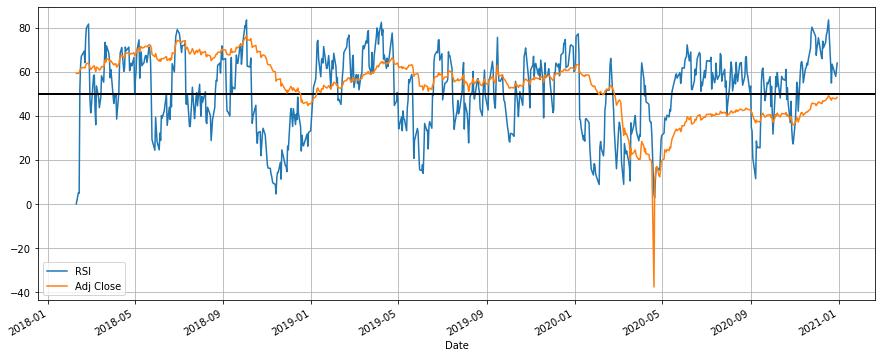

In [5]:
plt.figure(figsize=(15,6))
df['RSI'].plot(legend=True).axhline(y=50, color="black", lw=2)
df['Adj Close'].plot(legend=True)
plt.grid(True)

In [6]:
pd.value_counts(df.BUY)

YES    406
NO     314
Name: BUY, dtype: int64

In [7]:
PnL = []

for i in range(len(df) - 12):
  if "YES" in df['BUY'].iloc[i]:
    for j in range(1,11):
      if df['RSI'].iloc[i+j] > 70:
        PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])
        break
      if df['RSI'].iloc[i+j] < 30:
        PnL.append(df['Open'].iloc[i+12] - df['Open'].iloc[i+1])
        break

pd.DataFrame(PnL)

,0
0,1.000000
1,0.459999
2,3.270000
3,3.400002
4,1.779999
...,...
238,0.820000
239,1.310001
240,1.370003
241,1.280003


In [8]:
len([i for i in PnL if i > 0])
len(PnL)
# winning rate
print(len([i for i in PnL if i > 0]) / len(PnL))

0.7407407407407407


In [9]:
tickers=["CL=F"]
start_date = dt.datetime(2018,1,1)
end_date = dt.datetime(2020,12,31)

def RSI_calculation(symbol):
  data = yf.download(tickers, start = start_date, end=end_date)
  data['MA_14'] = data['Adj Close'].rolling(window=14).mean()
  data['price_change'] = data['Adj Close'].pct_change()
  data['up_move'] = data['price_change'].apply(lambda x: x if x > 0 else 0)
  data['down_move'] = data['price_change'].apply(lambda x: abs(x) if x < 0 else 0)
  data['avg_up'] = data['up_move'].ewm(span=14).mean()
  data['avg_down'] = data['down_move'].ewm(span=14).mean()
  data = data.dropna()
  data['RS'] = data['avg_up'] / data['avg_down']
  data['RSI'] = data['RS'].apply(lambda x: 100 - (100/(x+1)))
  data.loc[(data['Adj Close'] > data['MA_14']) & (data['RSI'] > 30), "BUY"] = 'YES'
  data.loc[(data['Adj Close'] < data['MA_14']) | (data['RSI'] < 30), "BUY"] = 'NO'
  return (data)

def get_signals(data):
  buy_date = []
  sell_date = []

  for i in range(len(data) - 11):
    if "YES" in data['BUY'].iloc[i]:
      buy_date.append(data.iloc[i+1].name)
      for j in range(1,11):
        if data['RSI'].iloc[i+j] > 70:
          sell_date.append(data.iloc[i+j+1].name)
          break
        elif j == 10:
          sell_date.append(data.iloc[i+j+1].name)

  return (buy_date, sell_date)

dataframe = RSI_calculation(tickers[0])
buy, sell = get_signals(dataframe)


[*********************100%***********************]  1 of 1 completed


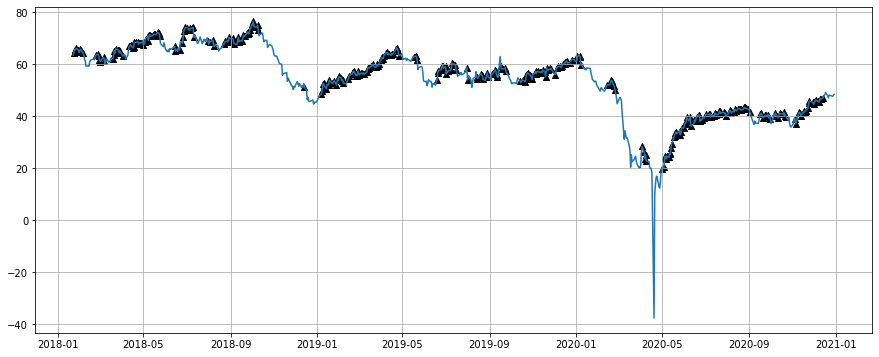

In [10]:
plt.figure(figsize = (15,6))
plt.scatter(dataframe.loc[buy].index, 
            dataframe.loc[buy]['Adj Close'], 
            marker = '^', 
            c = 'k')
plt.plot(dataframe['Adj Close'])
plt.grid(True); plt.show()

In [11]:
profits = (dataframe.loc[sell].Open.values - dataframe.loc[buy].Open.values) / dataframe.loc[sell].Open.values
len([i for i in profits if i > 0]) / len(profits)

0.6896551724137931

In [12]:
len(profits)

406

In [13]:
matrix_signals = []
matrix_profit = []

for i in range(len(tickers)):
  dataframe = RSI_calculation(tickers[i])
  buy, sell = get_signals(dataframe)
  profits = (dataframe.loc[sell].Open.values - dataframe.loc[buy].Open.values) / dataframe.loc[sell].Open.values
  matrix_signals.append(buy)
  matrix_profit.append(profits)

[*********************100%***********************]  1 of 1 completed


In [14]:
final_profit = []

for i in matrix_profit:
  for e in i:
    final_profit.append(e)

DataFrame(final_profit)

,0
0,0.008382
1,0.022161
2,-0.009655
3,0.014053
4,-0.009919
...,...
401,0.027890
402,0.029168
403,0.027251
404,-0.005136


In [15]:
wins = [i for i in final_profit if i > 0]
len(wins) / len(final_profit)

0.6896551724137931

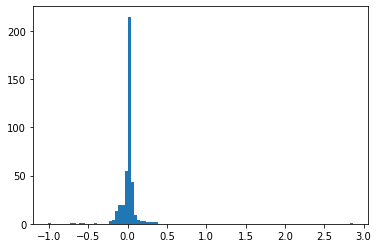

In [16]:
plt.hist(final_profit, bins=100)
plt.show()

In [17]:
for i in matrix_signals:
  for e in i:
    if e.year == 2020:
      print(e)

2020-01-02 00:00:00
2020-01-03 00:00:00
2020-01-06 00:00:00
2020-01-07 00:00:00
2020-01-08 00:00:00
2020-02-14 00:00:00
2020-02-18 00:00:00
2020-02-19 00:00:00
2020-02-20 00:00:00
2020-02-21 00:00:00
2020-02-24 00:00:00
2020-02-25 00:00:00
2020-04-03 00:00:00
2020-04-06 00:00:00
2020-04-07 00:00:00
2020-04-08 00:00:00
2020-04-09 00:00:00
2020-05-01 00:00:00
2020-05-04 00:00:00
2020-05-05 00:00:00
2020-05-06 00:00:00
2020-05-07 00:00:00
2020-05-08 00:00:00
2020-05-11 00:00:00
2020-05-12 00:00:00
2020-05-13 00:00:00
2020-05-14 00:00:00
2020-05-15 00:00:00
2020-05-18 00:00:00
2020-05-19 00:00:00
2020-05-20 00:00:00
2020-05-21 00:00:00
2020-05-22 00:00:00
2020-05-26 00:00:00
2020-05-27 00:00:00
2020-05-28 00:00:00
2020-05-29 00:00:00
2020-06-01 00:00:00
2020-06-02 00:00:00
2020-06-03 00:00:00
2020-06-04 00:00:00
2020-06-05 00:00:00
2020-06-08 00:00:00
2020-06-09 00:00:00
2020-06-10 00:00:00
2020-06-11 00:00:00
2020-06-16 00:00:00
2020-06-17 00:00:00
2020-06-18 00:00:00
2020-06-19 00:00:00


In [19]:
import numpy as np
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

ticker = "CL=F"
start_date = dt.datetime(2018,1,1)
end_date = dt.datetime(2020,12,31)
class DataBase():
  def __init__(self, ticker, days):
    self.ticker = ticker
    data = yf.download(ticker, start = start_date, end =end_date )
    self.df = DataFrame(data)
    pd.set_option("display.max_columns", None)
    self.df[self.df.index.dayofweek < 5]
    self.df= self.df[-days:]

  def quote(self):
    return self.df

db = DataBase(ticker, 1000)
df = db.quote()
# print(df.tail())

# calculate the return of the day and add as new column
df['price_change'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1) )
df.dropna(inplace=True)

# calculate the movement on the price compared to the previous day closing price
df['movement'] = df['Adj Close'] - df['Adj Close'].shift(1)

df['up'] = np.where((df['movement'] > 0), df['movement'],0)

df['down'] = np.where((df['movement'] < 0), df['movement'],0)

window_size = 14
# calculate moving average of the last 14 days  gains
up = df['up'].rolling(window_size).mean()

# calculate moving average of the last 14 days  losses
down = df['down'].abs().rolling(window_size).mean()

RS = up / down
RSI = 100.0 - (100.0 / (1.0 + RS))

RSI = RSI.rename("RSI")
print(RSI)

[*********************100%***********************]  1 of 1 completed
Date
2018-01-03          NaN
2018-01-04          NaN
2018-01-05          NaN
2018-01-08          NaN
2018-01-09          NaN
                ...    
2020-12-22    61.153869
2020-12-23    64.519922
2020-12-28    58.076022
2020-12-29    63.494000
2020-12-30    66.393473
Name: RSI, Length: 744, dtype: float64


We need three lines of code to ensure that our strategy is defined appropriately. E.g. 1 when we need to be long:

The first line of code on the long column, ensures that we will have a 1, if RSI is below 30.
The second line of code, ensures that we will have 0 if the RSI is above 70.
Then, finally, the third line of code, will ‘forward fill’ and propagate the last valid observation forward to get rid of the nan.
Above three lines will ensure that we only go long when we cross the line from below 30.

Finally, we calculate the gain and loss for each of the day and the accumulative return. Below screenshot shows that with this strategy, we would get an accumulative return of 50% if we followed the strategy during the last 5 years.

In [20]:
new_df = pd.merge(df, RSI, left_index=True, right_index=True)

#If the indicator’s line crosses the level 30 from below, a long position (Buy) is opened.  
new_df['long'] = np.where((new_df['RSI'] < 20),1,np.nan)
new_df['long'] = np.where((new_df['RSI'] > 80),0, new_df['long'])

new_df['long'].ffill(inplace=True)

new_df['gain_loss'] = new_df['long'].shift(1) * new_df['price_change']

new_df['total'] =  new_df['gain_loss'].cumsum()

new_df[['Adj Close', 'price_change',	'movement',	
       'up','down',	'RSI','long','gain_loss', 'total']].tail(500)

,Adj Close,price_change,movement,up,down,RSI,long,gain_loss,total
Date,,,,,,,,,
2018-12-27,44.610001,-0.035455,-1.610001,0.000000,-1.610001,26.289795,1.0,-0.035455,-0.142830
2018-12-28,45.330002,0.016011,0.720001,0.720001,0.000000,32.072182,1.0,0.016011,-0.126819
2018-12-31,45.410000,0.001763,0.079998,0.079998,0.000000,27.695169,1.0,0.001763,-0.125055
2019-01-02,46.540001,0.024580,1.130001,1.130001,0.000000,35.759904,1.0,0.024580,-0.100476
2019-01-03,47.090000,0.011748,0.549999,0.549999,0.000000,35.347041,1.0,0.011748,-0.088727
...,...,...,...,...,...,...,...,...,...
2020-12-22,47.020000,-0.015197,-0.720001,0.000000,-0.720001,61.153869,0.0,-0.000000,0.369355
2020-12-23,48.119999,0.023125,1.099998,1.099998,0.000000,64.519922,0.0,0.000000,0.369355
2020-12-28,47.619999,-0.010445,-0.500000,0.000000,-0.500000,58.076022,0.0,-0.000000,0.369355


In [21]:
#alternative strategy of buying and hold stock:
buy_hold_strat = (new_df['Adj Close'][-1] - new_df['Adj Close'][1]) / new_df['Adj Close'][1]
print(buy_hold_strat)

-0.21948068318086333
